# NYC 311 Project Code

In [1]:
import numpy as np
import pandas as pd
import warnings
from datetime import datetime
from scipy import stats
from scipy.stats import ttest_1samp
warnings.filterwarnings('ignore')

### Task 1) Import a NYC 311 Service Request.

In [2]:
alldata=pd.read_csv('servicerequest.csv')
alldata.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"


### Checking Data Type of existing column 'Created Date' &'Closed Date'.

In [3]:
alldata[['Created Date','Closed Date']].dtypes

Created Date    object
Closed Date     object
dtype: object

### Task 2) Conversion to datetime data type.

In [4]:
alldata['Created Date']=pd.to_datetime(alldata['Created Date'])
alldata['Closed Date']=pd.to_datetime(alldata['Closed Date'])
alldata[['Created Date','Closed Date']].dtypes

Created Date    datetime64[ns]
Closed Date     datetime64[ns]
dtype: object

### Task 3) Creating new column 'Request_closing_Time' = Closing time - Created time.

In [5]:
alldata['Request_Closing_Time']=(alldata['Closed Date']-alldata['Created Date']).dt.seconds/60/60
alldata['Request_Closing_Time'].head()

0    0.920833
1    1.437778
2    4.858611
3    7.753889
4    3.450556
Name: Request_Closing_Time, dtype: float64

### Task 4) Conclusions from data

#### Conclusion No 1) Five Cities with maximum no of complaints.

In [6]:
alldata.City.value_counts().sort_values(ascending=False).head()

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

#### Conclusion No 2) In each city maximum no of complain is of which type.

In [7]:
newframe1=pd.DataFrame(alldata.groupby('City')['Complaint Type'].value_counts())
newframe1.groupby('City').head(1)

,,Complaint Type
City,Complaint Type,
ARVERNE,Illegal Parking,58
ASTORIA,Blocked Driveway,2618
Astoria,Noise - Commercial,262
BAYSIDE,Illegal Parking,514
BELLEROSE,Illegal Parking,106
BREEZY POINT,Illegal Parking,15
BRONX,Blocked Driveway,12755
BROOKLYN,Blocked Driveway,28148
CAMBRIA HEIGHTS,Blocked Driveway,147


#### Conclusion No3) No of Complaints month wise in form of bar chart.

<AxesSubplot:xlabel='Created Date'>

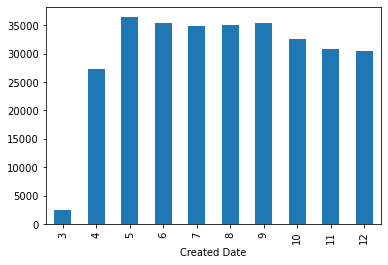

In [8]:
newframe2=pd.DataFrame(alldata['Created Date'].dt.month)
newframe2.groupby('Created Date').value_counts().plot(kind='bar')

#### Above chart shows maximum complaints are from 5th month and least complaints are from 3rd month

#### Conclusion 4) No of unique Complaint types

In [9]:
alldata['Complaint Type'].nunique()

24

### Task 5) Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different location Type

In [24]:
alldata.groupby(['Location Type','Complaint Type'])['Request_Closing_Time'].mean()

Location Type        Complaint Type     
Bridge               Homeless Encampment    3.819306
Club/Bar/Restaurant  Drinking               4.019785
                     Noise - Commercial     2.891485
                     Urinating in Public    4.491429
Commercial           Animal Abuse           4.568575
                                              ...   
Street/Sidewalk      Vending                3.791013
Subway Station       Animal Abuse           3.035606
                     Urinating in Public    1.152130
Terminal             Ferry Complaint             NaN
Vacant Lot           Derelict Vehicle       4.045354
Name: Request_Closing_Time, Length: 71, dtype: float64

### Task 6) Hypothesis Testing

#### Whether the average response time across complaint types is similar or not (overall)

In [11]:
Hnull1='The average response time across complaint types is similar'
Halternate1='The average response time across complaint types is not similar'

In [12]:
newframe3=alldata[alldata['Request_Closing_Time'].notnull()]
Sample=newframe3.sample(n=2500)
ttest,pvalue=ttest_1samp(Sample['Request_Closing_Time'],newframe3['Request_Closing_Time'].mean())

In [13]:
if(pvalue>0.05):
    print("Null Hypothesis is accepted,",Hnull1)
else:print("Null Hypothesis is Rejected",Halternate1)

Null Hypothesis is accepted, The average response time across complaint types is similar


#### Are the type of complaint or service requested and location related

In [14]:
Hnull2='The type of complaint or service requested and location are not related'
Halternate2='The type of complaint or service requested and location are related'

In [15]:
newframe4=pd.crosstab(newframe3['Complaint Type'],newframe3['Location Type'])
observedval=newframe4.values
squarex,pvalue,dof,expected=stats.chi2_contingency(newframe4)

In [16]:
if(pvalue>0.05): print("Null Hypothesis accepted",(Hnull2))      
else:(print("Null Hypothesis is rejected,",Halternate2))  

Null Hypothesis is rejected, The type of complaint or service requested and location are related
